# Funções

Funções em Python são blocos de código reutilizáveis que permitem estruturar programas de forma modular e organizada. Elas são definidas usando a palavra-chave ````def```` seguida pelo nome da função e parênteses, que podem incluir parâmetros.

As funções são essenciais para a criação de programas mais legíveis, manuteníveis e escaláveis, pois permitem a divisão de tarefas complexas em partes menores e mais gerenciáveis. Além disso, funções facilitam a reutilização de código, evitando a repetição desnecessária e promovendo a eficiência. Python oferece diversas funcionalidades integradas para definir e trabalhar com funções, incluindo parâmetros padrão, funções anônimas (lambdas) e a capacidade de retornar múltiplos valores.

## Decoradores

Funções em Python são objetos de primeira classe. Isso significa que as funções podem ser passadas e usadas como argumentos. Portanto, funções são como qualquer outro objeto em Python.


In [37]:
def a(nome):
    return f"Oi {nome}!"

def b(nome):
    return f"{nome}, Vamos aprender python!"

def c(funcao, nome):
    return funcao(nome)

print(c(a,"matheus"))

print(c(b,"Matheus"))


Oi matheus!
Matheus, Vamos aprender python!


### Decoradores simples

Os decoradores servem para colocar uma personalização de comportamento em outra funcionalidade.

In [38]:
def decorador(funcoes):
    def envelope():
        print("Antes")
        funcoes()
        print("Depois")
    
    return envelope

def funcao(msg="mensagem"):
    print(msg)

ola_mundo = decorador(funcao)
ola_mundo()

Antes
mensagem
Depois


O Python permite que você use decoradores de maneira mais simples com o símbolo @.


In [39]:
def decorador(funcao):
    def envelope():
        print("Antes")
        funcao()
        print("Depois")
    
    return envelope

@decorador
def funcao(msg="mensagem"):
    print(msg)


funcao()

Antes
mensagem
Depois


### Decoradores complexos

Podemos usar ````*args```` e ````**kwargs```` na função interna, com isso ela aceitará um número arbitrário de argumentos posicionais e de palavras-chave.

In [40]:
def decorador(funcao):
    def envelope(*args,**kw):
        print("Antes")
        funcao(*args,**kw)
        print("Depois")
    
    return envelope

@decorador
def funcao(msg="mensagem"):
    print(msg)


funcao("João")

Antes
João
Depois


### Retornando valores de funções decoradas


O decorador pode decidir se retorna o valor da função decorada ou não. Para que o valor seja retornado a função de envelope deve retornar o valor da função decorada.


In [41]:
def decorador(funcao):
    def envelope(*args,**kw):
        print("Antes")
        resul = funcao(*args,**kw)
        print("Depois")
        return resul
    
    return envelope

@decorador
def funcao(msg="mensagem"):
    print(msg)
    return msg.upper()


retorno = funcao("João")
print(retorno)

Antes
João
Depois
JOÃO


## Instrospecção

Introspecção é a capacidade de um objeto saber sobre seus próprios atributos em tempo de execução.


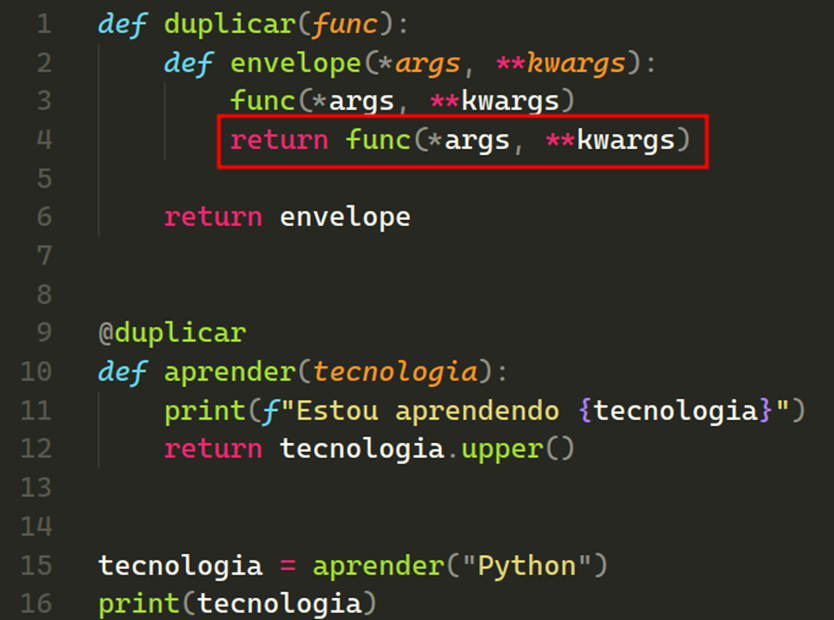

In [42]:
def decorador(funcao):
    def envelope(*args,**kw):
        print("Antes")
        funcao(*args,**kw)
        print("Depois")
    
    return envelope

@decorador
def funcao(msg="mensagem"):
    print(msg)


funcao("João")
print(funcao)

Antes
João
Depois
<function decorador.<locals>.envelope at 0x000001E55FB6D580>


Nesse exemplo, o nome da função se perde no decorador. Para resolver esse problema é usado a biblioteca ````functools````

In [43]:
import functools

def decorador(funcao):
    @functools.wraps(funcao)
    def envelope(*args,**kw):
        print("Antes")
        funcao(*args,**kw)
        print("Depois")
    
    return envelope

@decorador
def funcao(msg="mensagem"):
    print(msg)


funcao("João")
print(funcao)

Antes
João
Depois
<function funcao at 0x000001E55FB36340>


## Inner functions

É possível definir funções dentro de outras funções. Tais  funções são chamadas de funções internas.


In [44]:
def main():
    print("Executando a main")

    def funcao_1():
        print("Escreve função 1")
    
    def funcao_2():
        print("Escreve função 2")
    
    funcao_1()
    funcao_2()

main()

Executando a main
Escreve função 1
Escreve função 2


Python também permite que você use funções como valores de retorno.

In [45]:
def calculadora(operacao):
    def soma(a,b):
        return a + b
    def subtracao(a,b):
        return a - b
    def divisao(a,b):
        return a / b
    def multiplicacao(a,b):
        return a * b
    
    match operacao:
        case "+":
            return soma
        case "-":
            return subtracao
        case "/":
            return divisao
        case "*":
            return multiplicacao

print(calculadora("+"))  
print(calculadora("-")) 
print(calculadora("/")) 
print(calculadora("*"))
print(f"Soma: {calculadora('+')(2,2)}")       

<function calculadora.<locals>.soma at 0x000001E55FA5FA60>
<function calculadora.<locals>.subtracao at 0x000001E55FB34D60>
<function calculadora.<locals>.divisao at 0x000001E55FB6D580>
<function calculadora.<locals>.multiplicacao at 0x000001E55FB6D4E0>
Soma: 4
